In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal','Density']

In [5]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Signal   300 non-null    float64
 1   Density  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<AxesSubplot:xlabel='Signal', ylabel='Density'>

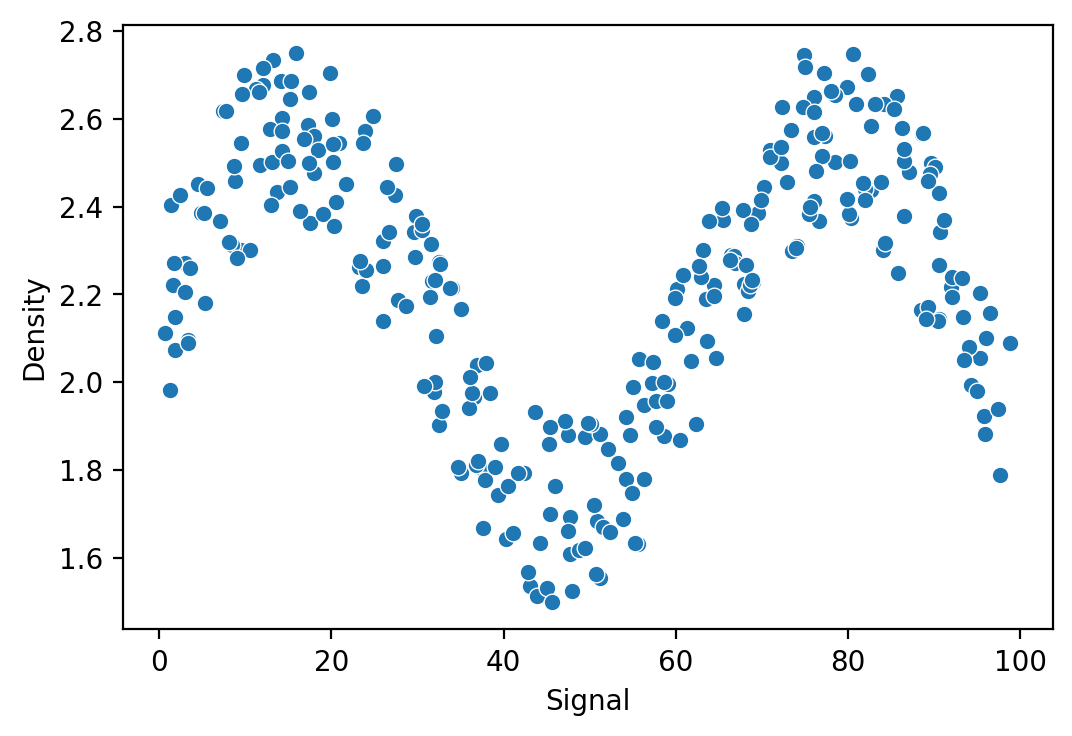

In [8]:
plt.figure(dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [30]:
X=df['Signal'].values.reshape(-1, 1)
y=df['Density']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [31]:
def run_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    mae = mean_absolute_error(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print(f'RMSE: {rmse}\n')
    print(f'MAE: {mae}')
    plt.figure(dpi=200)
    sns.scatterplot(data=df,x='Signal',y='Density')
    plt.plot(np.arange(0,100),model.predict(np.arange(0,100).reshape(-1,1)))
     

RMSE: 0.29913137925459526

MAE: 0.2427044537523457


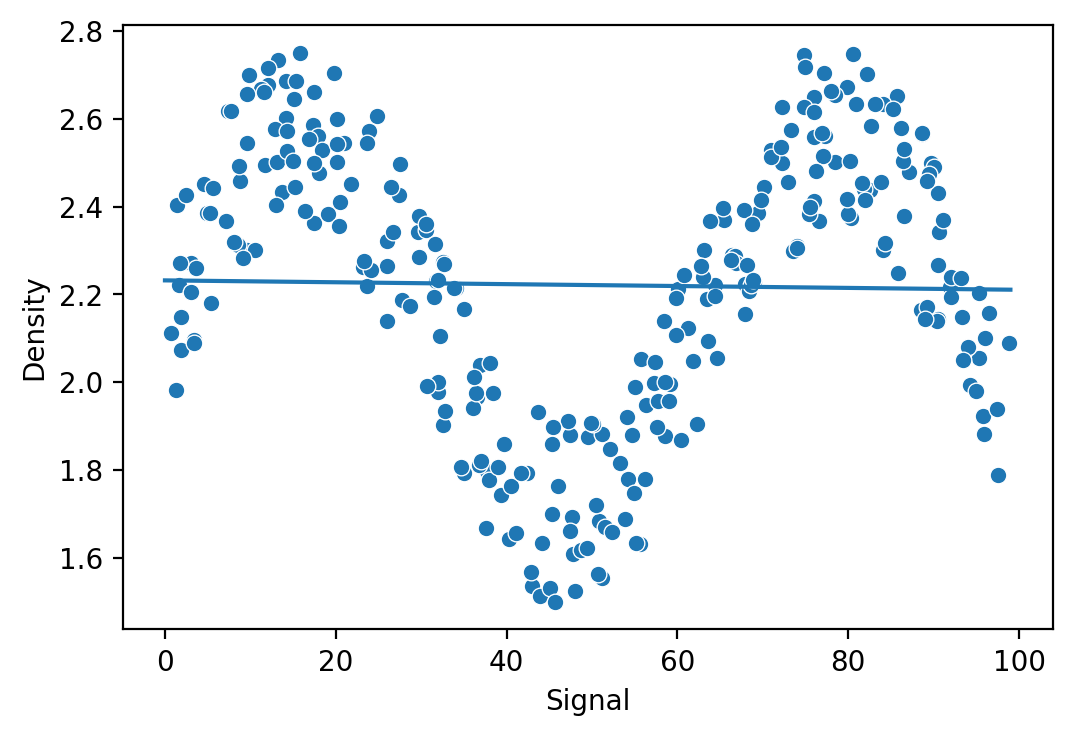

In [32]:
#Linear
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
run_model(model_lin,X_train,X_test,y_train,y_test)

RMSE: 0.13711239675093356

MAE: 0.11944510660941174


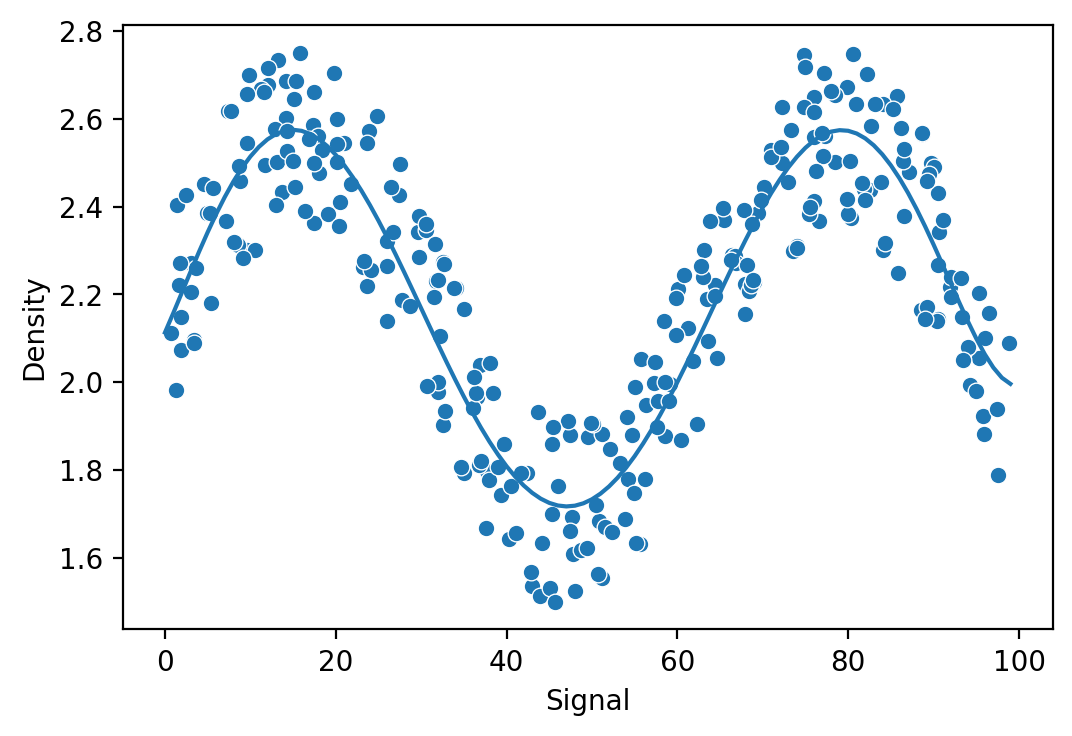

In [33]:
#Polyn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

RMSE: 0.16613501490383994

MAE: 0.13039386840428746
RMSE: 0.14246132000882275

MAE: 0.1202720922018336
RMSE: 0.13736843022641249

MAE: 0.11976228179857681
RMSE: 0.14156960405944083

MAE: 0.12346449702236911


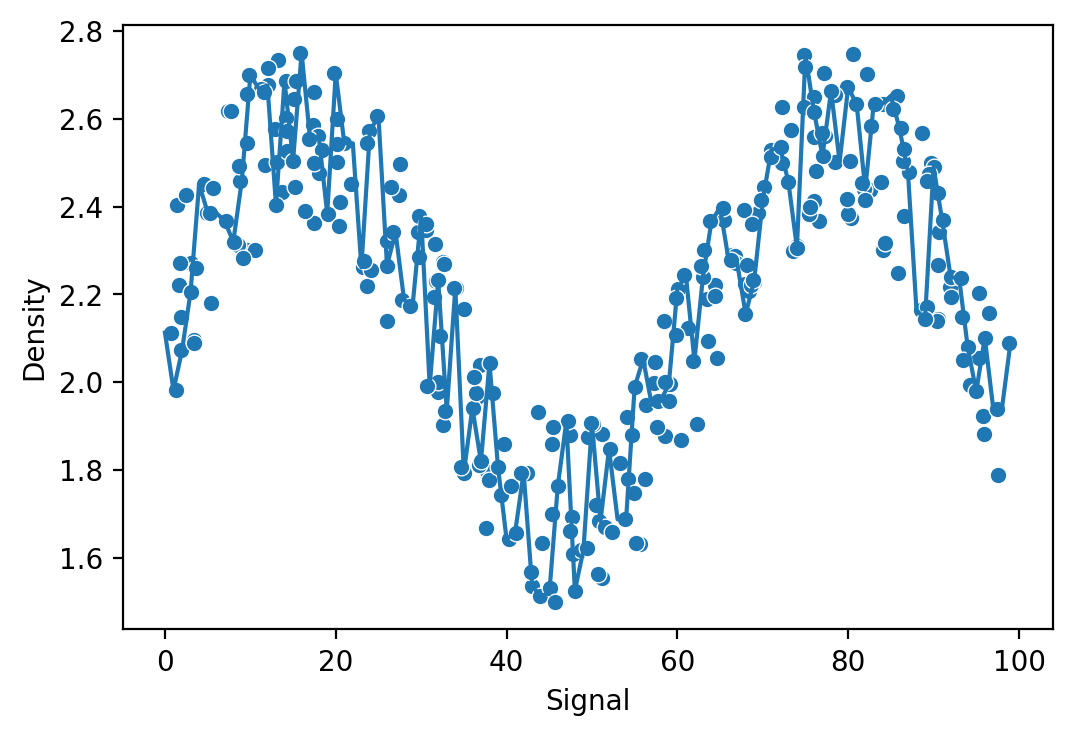

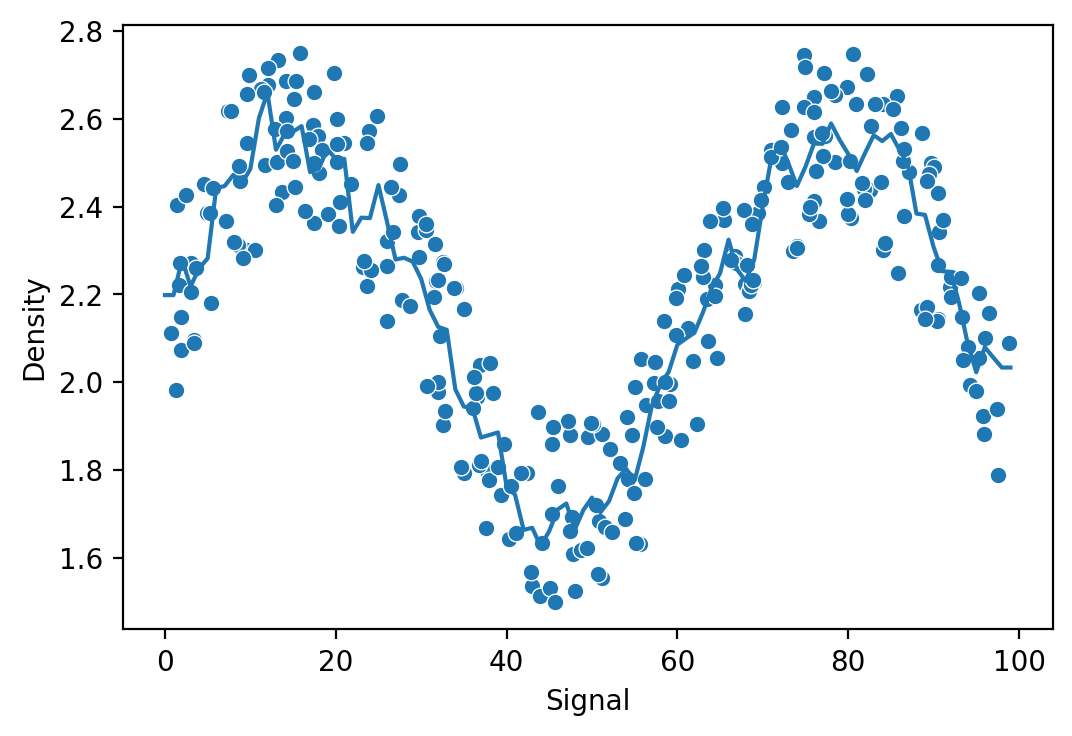

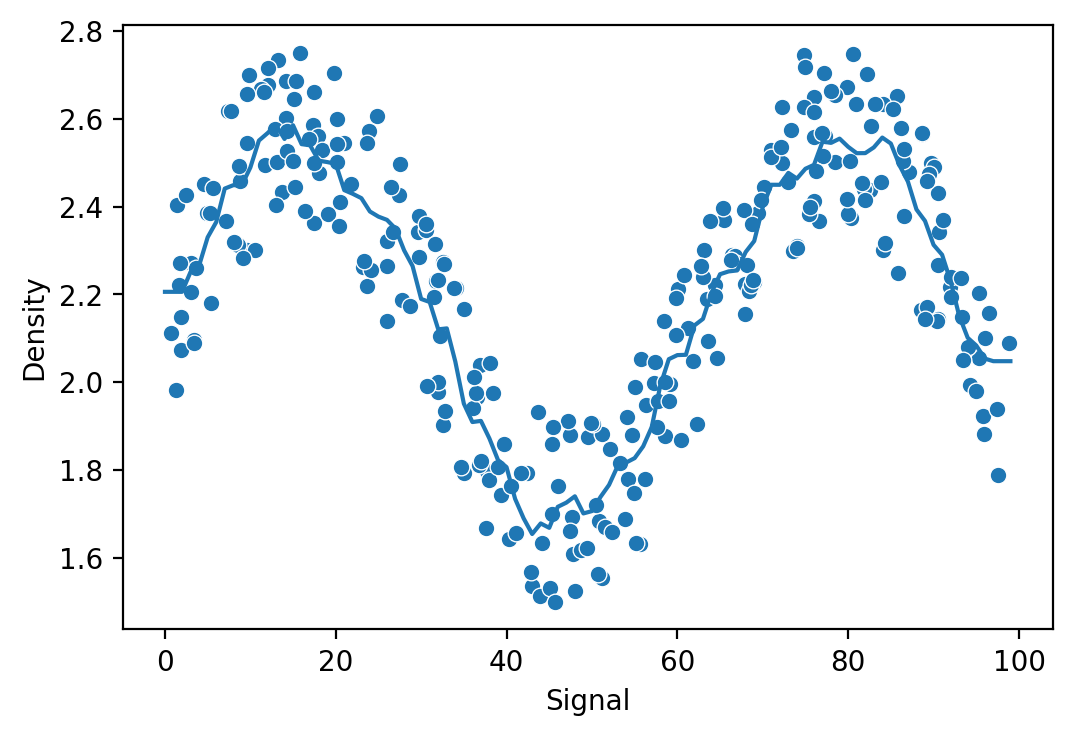

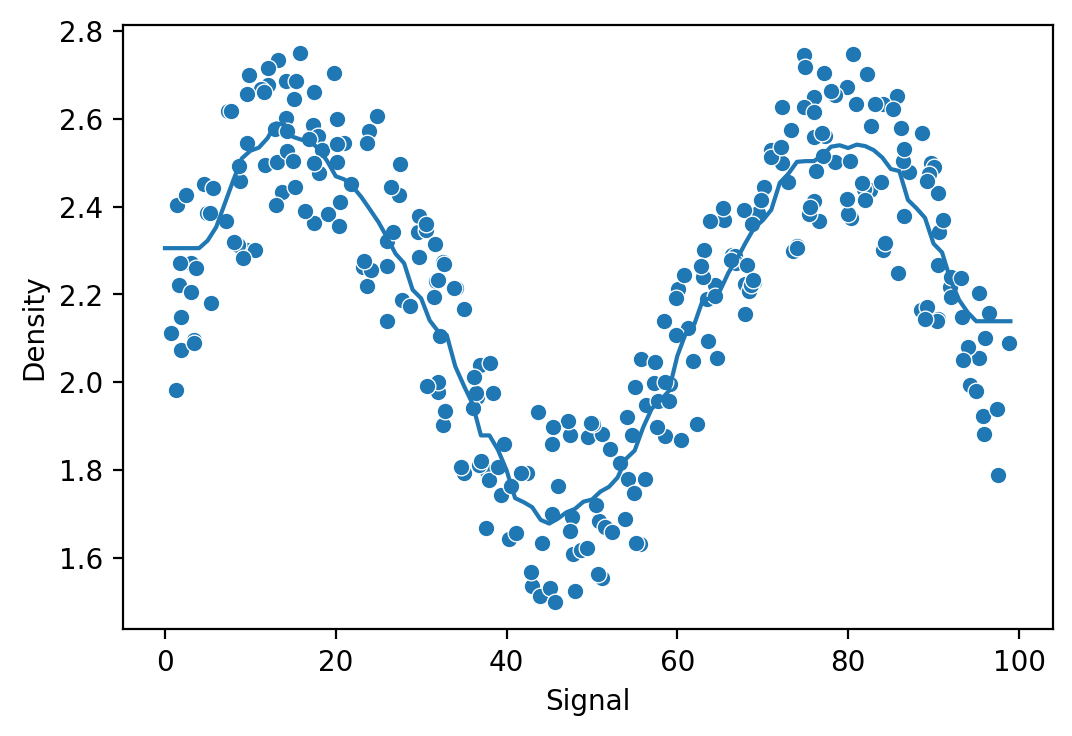

In [36]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
k_values = [1,5,10,20]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    run_model(knn,X_train,X_test,y_train,y_test)

RMSE: 0.13394872725564433

MAE: 0.11691478051841668


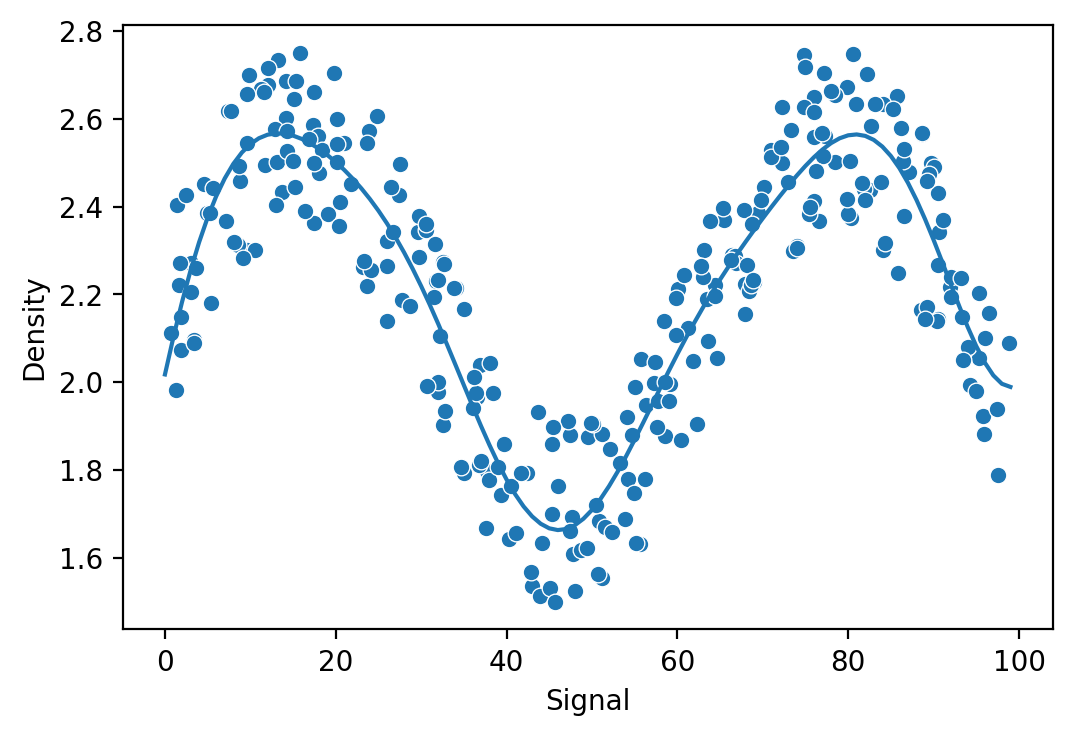

In [37]:
#SVM
from sklearn.svm import SVR
svr = SVR()
grid_params = {'C':[0.01,0.1,1,5,100,1000],'gamma':['auto','scale']}
grid = GridSearchCV(svr,grid_params)
run_model(grid,X_train,X_test,y_train,y_test)

RMSE: 0.16613501490383994

MAE: 0.13039386840428746


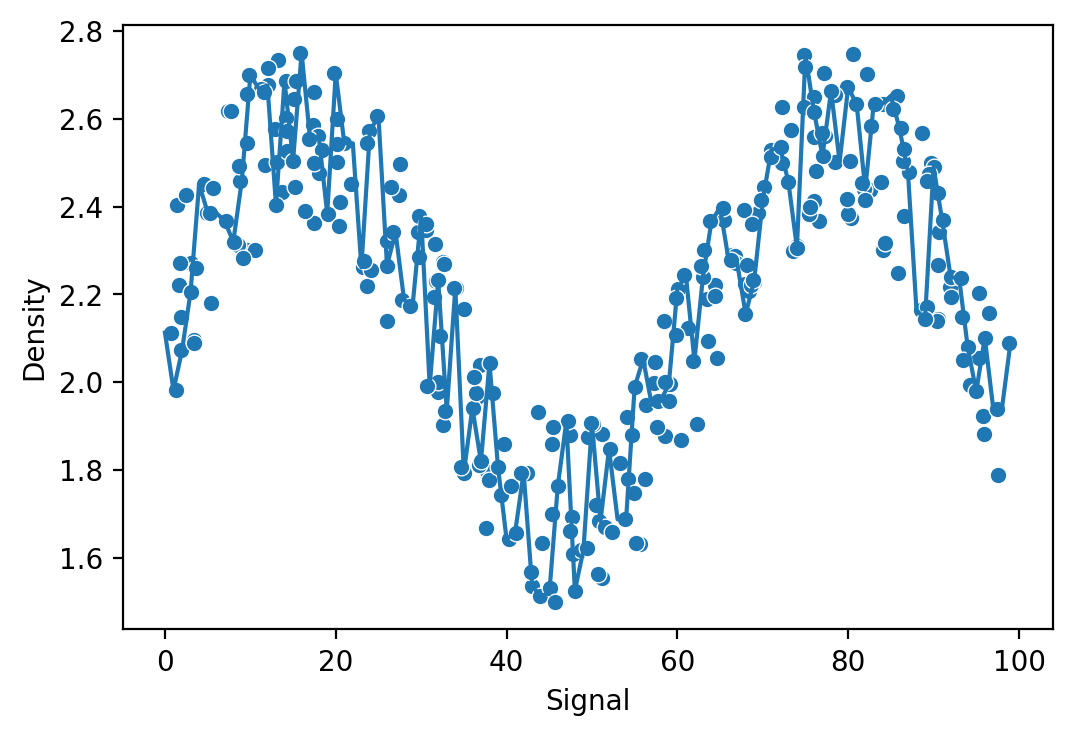

In [38]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
run_model(tree,X_train,X_test,y_train,y_test)

RMSE: 0.1920014982390839

MAE: 0.15312657948612213


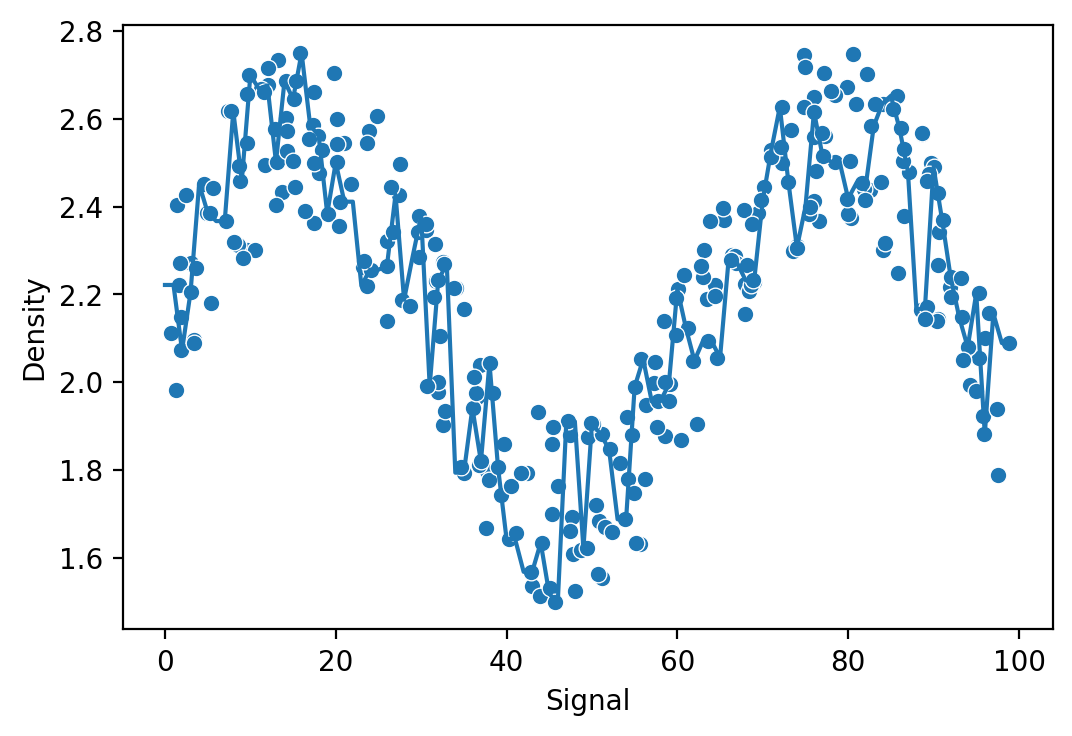

In [40]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rtree = RandomForestRegressor(n_estimators=1)
run_model(rtree,X_train,X_test,y_train,y_test)